In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Comp 550 NLP/financial_sentiment_data.csv"

Mounted at /content/drive/
'/content/drive/My Drive/Comp 550 NLP/financial_sentiment_data.csv'


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
import pandas as pd
import csv


In [ ]:
# Specify the path to your CSV file
csv_file_path = "/content/drive/My Drive/Comp 550 NLP/financial_sentiment_data.csv"

# Create empty lists for each column
labels = []
texts = []

label_to_encoding = {
    "negative": 0,
    "neutral": 1,
    "positive": 2
}

# Open the CSV file and read its contents
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
        labels.append(label_to_encoding[row["sentiment"]])
        texts.append(row["text"])

print(texts)
print(labels)

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .', 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .', 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .', "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .", "FINANCING OF ASPOCOMP 'S

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')  # Download the Punkt tokenizer data
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

#stemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()

preprocessed_texts = [] # A list where each element is a string corresponding to the tokens after the stopwords and non-alnum tokens are removed for this fact
for text in texts:
  tokens = nltk.word_tokenize(text)
  new_tokens = []
  for word in tokens:
    if word.isalnum() and word.lower() not in stop_words:
      #stemmed_word = stemmer.stem(word.lower())
      lemmatized_word = lemmatizer.lemmatize(word.lower())
      new_tokens.append(lemmatized_word)
  preprocessed_texts.append(' '.join(new_tokens))

print(preprocessed_texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['according gran company plan move production russia although company growing', 'technopolis plan develop stage area le square meter order host company working computer technology telecommunication statement said', 'international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported', 'new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability', 'according company updated strategy year basware target net sale growth range 20 operating profit margin 10 net sale', 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs', 'last quarter 2010 componenta net sale doubled eur131m eur76m period year earlier moved zero profit loss eur7m', 'third quarter 2010 net sale increased eur mn operating profit

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(preprocessed_texts, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)


# Finding the best hyperparameter for `n_estimators`

In [ ]:
n_estimators_list = [25, 50, 100, 200, 300, 400, 500, 600, 700]
accuracies = []

for n in n_estimators_list:
  rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
  rf_classifier.fit(X_train_vec, y_train)

  # Make predictions on the val set
  y_pred = rf_classifier.predict(X_val_vec)

  # Evaluate the performance of the model
  accuracy = accuracy_score(y_val, y_pred)
  accuracies.append(accuracy)
  print(f"Accuracy for n_estimators={n} : {accuracy}")

Accuracy for n_estimators=25 : 0.7280927835051546
Accuracy for n_estimators=50 : 0.7435567010309279
Accuracy for n_estimators=100 : 0.7435567010309279
Accuracy for n_estimators=200 : 0.7255154639175257
Accuracy for n_estimators=300 : 0.729381443298969
Accuracy for n_estimators=400 : 0.7306701030927835
Accuracy for n_estimators=500 : 0.729381443298969
Accuracy for n_estimators=600 : 0.7332474226804123
Accuracy for n_estimators=700 : 0.7319587628865979


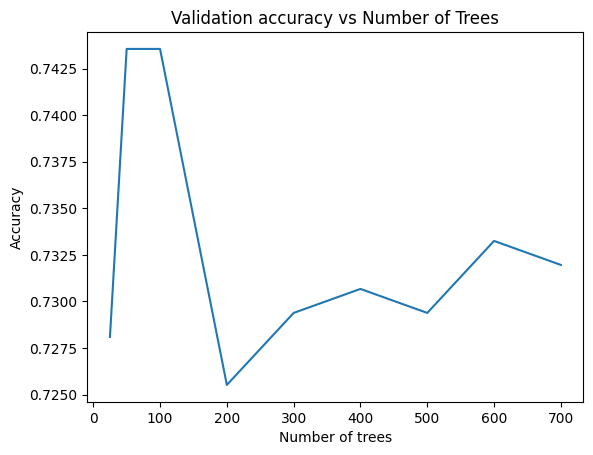

In [ ]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.plot(n_estimators_list, accuracies)

# Adding labels and title
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Validation accuracy vs Number of Trees')

# Save the plot as a PNG image
plt.savefig('plot1.png')

# Display the plot
plt.show()


Both 50 or 100 would be a good value for `n_estimators`. Let's choose 100.

# Combine train and validation sets

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_val)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train_val)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vec)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7371134020618557
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50       110
           1       0.74      0.96      0.83       571
           2       0.77      0.43      0.55       289

    accuracy                           0.74       970
   macro avg       0.72      0.60      0.63       970
weighted avg       0.74      0.74      0.71       970



# Multi-layer Perceptron

## Adding the data into data loaders

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tfidf_tensor = torch.tensor(X_train_vec.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tfidf_tensor = torch.tensor(X_val_vec.toarray(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tfidf_tensor = torch.tensor(X_test_vec.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Create only DataLoader for train set
train_dataset = TensorDataset(X_train_tfidf_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, *hidden_sizes):
        super(MLP, self).__init__()

        # Create a list to store the layers
        layers = []

        # Add input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Add hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())

        # Add output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine all layers
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)



In [ ]:
print(X_train_vec.shape)
print(X_test_vec.shape[1])

(3100, 6660)
6660


## Finding appropriate hyperparameter values

## Experiment 1: Varying Learning Rate

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

input_size = X_train_vec.shape[1]
output_size = 3
hidden_sizes = [64, 32]

num_epochs = 10

for lr in learning_rates:
    model = MLP(input_size, output_size, *hidden_sizes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

    # Evaluation
    with torch.no_grad():
        model.eval()
        outputs = model(X_val_tfidf_tensor)
        predicted_labels = torch.argmax(outputs, dim=1)

    accuracy = torch.sum(predicted_labels == y_val_tensor).item() / len(y_val)

    print(f"Accuracy on validation set for learning rate {lr}: {accuracy}")




Accuracy on validation set for learning rate 0.0001: 0.6765463917525774
Accuracy on validation set for learning rate 0.001: 0.7280927835051546
Accuracy on validation set for learning rate 0.01: 0.7126288659793815
Accuracy on validation set for learning rate 0.1: 0.5579896907216495


The highest accuracy is produced by learning rate 0.001 so we'll chose that

In [ ]:
lr = 0.001

## Experiment 2: Number of hidden layers

In [ ]:
hidden_layers = [[64], [64, 32], [64, 32, 16]]

num_epochs = 10

for i, hidden_sizes in enumerate(hidden_layers):
    model = MLP(input_size, output_size, *hidden_sizes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

    # Evaluation
    with torch.no_grad():
        model.eval()
        outputs = model(X_val_tfidf_tensor)
        predicted_labels = torch.argmax(outputs, dim=1)

    accuracy = torch.sum(predicted_labels == y_val_tensor).item() / len(y_val)
    print(f"Accuracy on validation set for {i+1} hidden layers: {accuracy}")




Accuracy on validation set for 1 hidden layers: 0.7242268041237113
Accuracy on validation set for 2 hidden layers: 0.7319587628865979
Accuracy on validation set for 3 hidden layers: 0.720360824742268


2 hidden layers seem to perform slightly better than 1 or 3 hidden layers.

In [ ]:
hidden_sizes = [64, 32]

## Experiment 3: Number of Epochs

In [ ]:
num_epochs_values = [5, 10, 15, 20]

for num_epochs in num_epochs_values:
    model = MLP(input_size, output_size, *hidden_sizes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

    # Evaluation
    with torch.no_grad():
        model.eval()
        outputs = model(X_val_tfidf_tensor)
        predicted_labels = torch.argmax(outputs, dim=1)

    accuracy = torch.sum(predicted_labels == y_val_tensor).item() / len(y_val)

    print(f"Accuracy on validation set for {num_epochs} number of epochs: {accuracy}")

Accuracy on validation set for 5 number of epochs: 0.7358247422680413
Accuracy on validation set for 10 number of epochs: 0.7268041237113402
Accuracy on validation set for 15 number of epochs: 0.7087628865979382
Accuracy on validation set for 20 number of epochs: 0.7190721649484536


5 epochs performs better and the model probably starts overfitting after that

In [ ]:
num_epochs = 5

## Combine train and validation sets

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_val)
X_test_vec = vectorizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tfidf_tensor = torch.tensor(X_train_vec.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_val, dtype=torch.long)

X_test_tfidf_tensor = torch.tensor(X_test_vec.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create only DataLoader for train set
train_dataset = TensorDataset(X_train_tfidf_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

input_size = X_train_vec.shape[1]

## MLP with best hyperparameters found

In [ ]:
model = MLP(input_size, output_size, *hidden_sizes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
  for inputs, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

# Evaluation
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tfidf_tensor)
    predicted_labels = torch.argmax(outputs, dim=1)

accuracy = torch.sum(predicted_labels == y_test_tensor).item() / len(y_test)

print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.7247422680412371
